# Projet numérique : choix du pas de temps

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Pas fixe

### Méthode d'Euler

In [3]:
def solve_euler_explicit(f, x0, dt, D) : # D*dt est la durée de simulation
    t=[0]*D
    x=[0]*D
    x[0] =  x0
    for j in range (D-1) :
        t[j+1] = t[j]+dt
        x[j+1] = x[j]+dt*f(t[j],x[j])
    return t, x

### Méthode de Heun

C'est un schéma d'ordre 2

In [4]:
def solve_heun(f, x0, dt, D) :
    t=[0]*D
    x=[0]*D
    x[0] =  x0
    for j in range (D-1) :
        t[j+1] = t[j] + dt
        x[j+1] = x[j] + (dt/2)*(f(t[j], x[j]) + f(t[j+1],x[j] + dt*f(t[j], x[j])))
    return t, x

### Exemple 1

Par exemple : $\dot{x} = f(t, x)$ où $f(t, x) = -\frac{x}{10}$ et $x_{0} = 1$

In [5]:
def f(t, x) :
    return -(1/10)*x

Alors $x(t) = e^{-\frac{t}{10}}$

In [6]:
def f1(t, x0) :
    return x0*np.exp(-0.1*t)

In [7]:
T, X = solve_euler_explicit(f, 1, 1, 40)
T2, X2 = solve_heun(f, 1, 1, 40)
T1 = np.linspace(0, 39, 40)
X1 = f1(T1, 1) #solution réelle

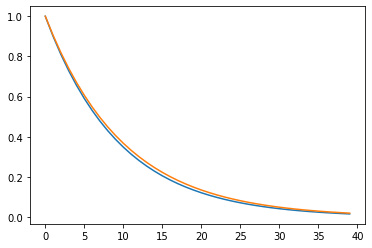

In [8]:
plt.plot(T, X)
plt.plot(T1, X1) #comparaison Euler-solution réelle

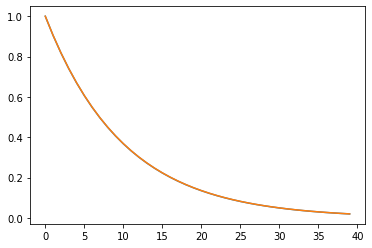

In [9]:
plt.plot(T1, X1)
plt.plot(T2, X2) #comparaison Heun-solution réelle

La méthode de Heun (ordre 2) permet d'obtenir un résultat plus proche de la solution réelle que celui obtenu avec le schéma d'Euler explicite (ordre 1).

### Exemple 2

Avec $\dot{X} = g(t,X)$ où $g(t,X) = AX$ avec $X = \begin{pmatrix} \dot{x} \\ x \end{pmatrix}$ et $A = \begin{pmatrix} 0 & -4 \\ 1 & 0 \end{pmatrix}$  

In [10]:
def g(t,x) :
    A=np.array([[0, -4], [1, 0]])
    return np.dot(A, x)

Alors $x(t) = x_{0}\cos(2t) + \frac{\dot{x}_{0}}{2}\sin(2t)$

In [11]:
def g1(t, x0) :
    return (x0[0]*np.cos(2*t) + (x0[1]/2)*np.sin(2*t))

Avec $X_{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

In [12]:
T, X = solve_euler_explicit(g, [1, 0], 0.1, 400)
T2, X2 = solve_heun(g, [1, 0], 0.1, 400)
T1 = np.linspace(0, 39, 400)
X1 = g1(T1, [1, 0]) 
Y = np.transpose(X)[0]
Y2 = np.transpose(X2)[0]

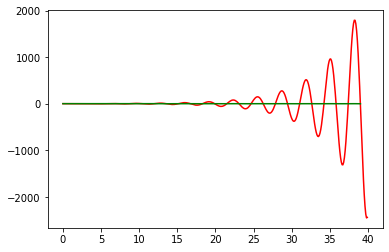

In [13]:
plt.plot(T, Y, color = 'r')
plt.plot(T1, X1, color = 'g')
# comparaison Euler-solution réelle

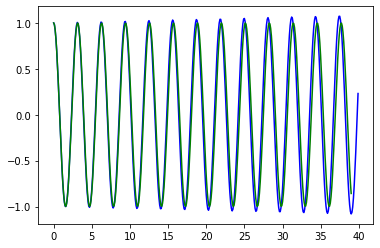

In [14]:
plt.plot(T2, Y2, color = 'b')
plt.plot(T1, X1, color = 'g')
# comparaison Heun-solution réelle

Avec la méthode de Heun, on obtient de nouveau un résultat plus proche de la solution réelle qu'avec Euler. Cependant, dans les deux cas, au fur et à mesure qu'on avance dans les simulations, les erreurs s'accumulent et l'écart entre solution approchée et solution réelle augmente.

## Euler avec pas de temps variable

In [15]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # pas de temps initial
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # temps interne : temps écoulé depuis la dernière valeur échantillonnée, utilisé pour le calcul de la prochaine valeur échantillonnée
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

Le pas d'échantillonnage reste constant : c'est dtmax. Tous les dtmax, on stocke dans xs la valeur x(t + dtmax), déterminée progressivement à partir de x(t). On ne calcule pas directement x(t+ dtmax). On découpe l'intervalle $[t, t + dtmax]$ en "tranches" de tailles variables, de longuer dt calculée à chaque itération (de la deuxième boucle while) en fonction de l'erreur commise : $dt = 0,9dt\frac{Tol_abs}{\|\frac{x_back - x}{2}\|}$. On calcule à chaque fois (sans la stocker dans xs) x(t + ti + dt) en fonction de x(t + ti), où ti est le temps écoulé depuis le dernier stockage d'une valeur x dans le tableau xs. On continue jusqu'à ce que ti atteigne ou dépasse le pas de temps d'échantillonnage dtmax